In [7]:
import numpy as np
from matplotlib import pylab as plt

In [72]:
from matplotlib import pylab as plt

def plot_prettier(dpi=150, fontsize=11, usetex=False): 
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    if usetex:
        plt.rc('text', usetex=usetex)
    else:
        plt.rcParams['mathtext.fontset'] = 'cm'
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plot_prettier()

<font size=4 color='black'>Computing the smoothed trend in Kepler 385 data and spreading around it and plotting with Matplotlib</font> 

Using AstroPy's sigma clip function.

In [15]:
def read_and_clean_kepler385():
    import pandas

    url = "https://drive.google.com/uc?id=1eAkBVawXvU_D-TyeKCvpwVo8ENiyrF5P"

    df = pandas.read_csv(url) 
    td = df['time'] # relative time in days
    ft = df['flux'] # normalized flux
    from astropy.stats import sigma_clip

    # use AstroPy's sigma_clip to clean out outliers
    ft_cleaned = sigma_clip(ft, sigma=3, maxiters=5,
                            cenfunc=np.mean, copy=False)

    t_cleaned = td[~ft_cleaned.mask]
    ft_cleaned = ft_cleaned[~ft_cleaned.mask]
    return t_cleaned, ft_cleaned

In [17]:
t_clean, f_clean = read_and_clean_kepler385()

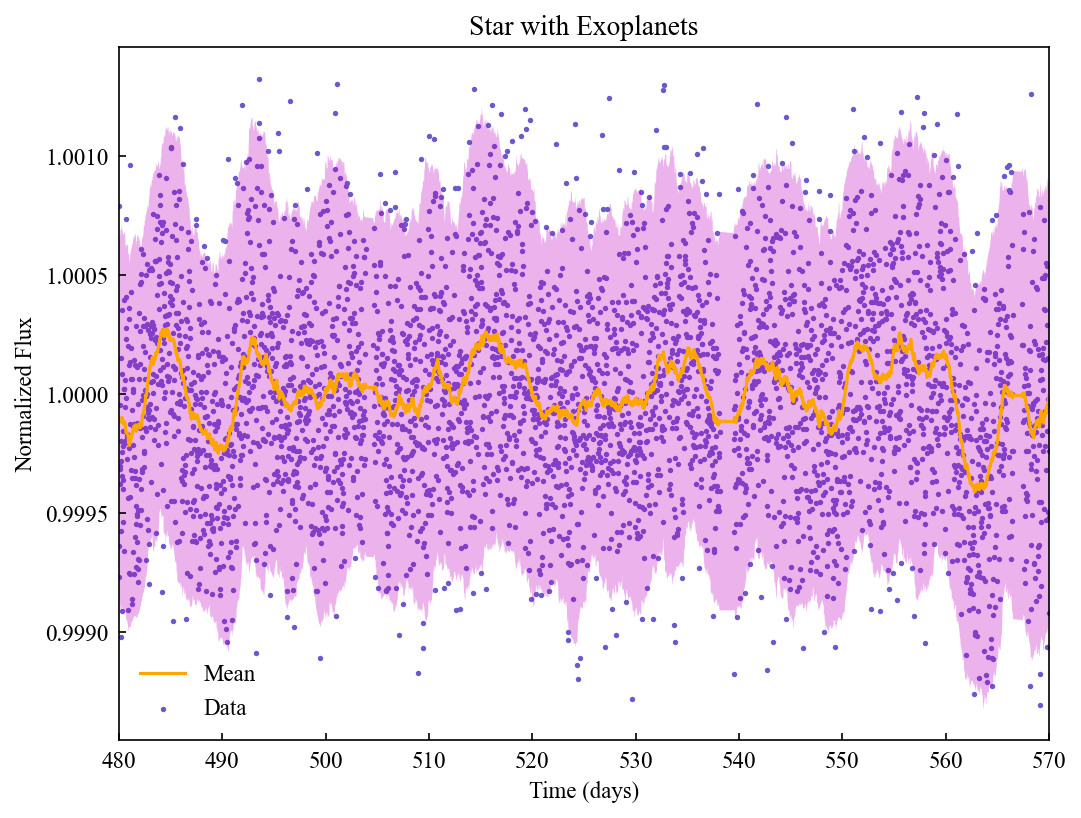

In [19]:
from matplotlib import pylab as plt
%matplotlib inline

nhalf = (570-480)//2

means = np.ones_like(f_clean)
stds = np.ones_like(f_clean)

for i in range(len(f_clean)): 
    beginning = i-nhalf if i-nhalf >= 0 else 0
    end = i + nhalf + 1 if i + nhalf + 1 <= len(f_clean) else len(f_clean)

    window = f_clean[beginning:end]

    means[i] = np.mean(window)
    stds[i] = np.std(window)

mask = (480 <= t_clean) & (t_clean <= 570)
t_time = t_clean[mask]
f_time = f_clean[mask]
mean_line = means[mask]
std_line = stds[mask]

plt.figure(figsize=(8,6))
plt.xlabel('Time (days)')
plt.ylabel('Normalized Flux')
plt.xlim(480, 570)
plt.plot(t_time, mean_line, color='orange', linewidth=1.5, label='Mean')
plt.scatter(t_time, f_time, marker='.', s=10, c='slateblue', label='Data')
plt.title('Star with Exoplanets')

y1 = mean_line - (2*std_line)
y2 = mean_line + (2*std_line)

plt.fill_between(t_time, y1, y2, color='m', edgecolor='none', alpha=0.3)

plt.legend(loc='best', frameon=False)
plt.show()


<font size=4 color='black'>Sigma-clipping method for outlier removal</font>

Implementing sigma clipping algorithm in a function, getting the outflag array and using it as a filter array on the original data array to compute the mean and standard deviation of array values.

In [6]:
xlist = [2.7259979258380795, 2.725999632147352, 2.725983379311019, 2.7259967464814183, 2.726000961008185, 
         2.726004337350948, 2.7260446824725735, 2.7260008788184846, 2.726001132144395, 2.7259907854743224, 
         2.7260009545402055, 2.726010592284221, 2.725996578441721, 2.7260068934177615, 2.7260695731929006, 
         2.7259917701792182, 2.725989677658162, 2.7260513799061705, 2.7260043354768406, 2.725996928362416, 
         2.72599343583698, 2.725997053516895, 2.7259983457823047, 2.7260020432652468, 2.726001796590367, 
         2.7260011282368515, 2.725989588725039, 2.725998658998815, 2.7260012570289853, 2.725993741795228, 
         2.726004151257968, 2.72599798115009, 2.725998217553923, 2.725993736637831, 2.7260255741730637, 
         2.7259983864283677, 2.726003650307268, 2.72600695101933, 2.72604912057824, 2.7260021088204245, 
         2.726001534214735, 2.7260008108185407, 2.7259917723483977, 2.7259985513493867, 2.726007639714895, 
         2.7260039857293146, 2.7259985066858197, 2.7260034789746372, 2.7260393330573636, 2.7259984502869337]

In [18]:
def sigma_clip(data, niter = 5, s_th = 3.0): 
    data = np.array(data)
    outflag = np.ones_like(data, dtype=bool)
    while niter > 0:
        xmean = np.mean(data[outflag])
        xstd = np.std(data[outflag])

        outflag = np.abs((data - xmean)/xstd) <= s_th

        niter = niter - 1

    filtered_arr = (data)[outflag]
    final_xmean = np.mean(filtered_arr)
    final_xstd = np.std(filtered_arr)

    return final_xmean, final_xstd, outflag

xlist = [2.7259979258380795, 2.725999632147352, 2.725983379311019, 2.7259967464814183, 2.726000961008185, 
         2.726004337350948, 2.7260446824725735, 2.7260008788184846, 2.726001132144395, 2.7259907854743224, 
         2.7260009545402055, 2.726010592284221, 2.725996578441721, 2.7260068934177615, 2.7260695731929006, 
         2.7259917701792182, 2.725989677658162, 2.7260513799061705, 2.7260043354768406, 2.725996928362416, 
         2.72599343583698, 2.725997053516895, 2.7259983457823047, 2.7260020432652468, 2.726001796590367, 
         2.7260011282368515, 2.725989588725039, 2.725998658998815, 2.7260012570289853, 2.725993741795228, 
         2.726004151257968, 2.72599798115009, 2.725998217553923, 2.725993736637831, 2.7260255741730637, 
         2.7259983864283677, 2.726003650307268, 2.72600695101933, 2.72604912057824, 2.7260021088204245, 
         2.726001534214735, 2.7260008108185407, 2.7259917723483977, 2.7259985513493867, 2.726007639714895, 
         2.7260039857293146, 2.7259985066858197, 2.7260034789746372, 2.7260393330573636, 2.7259984502869337]

print(sigma_clip(xlist, niter = 5, s_th = 3.0))

(2.725999101636576, 5.324944213100538e-06, array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True]))


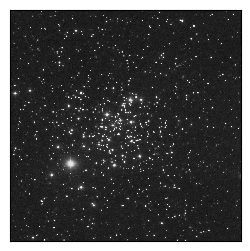

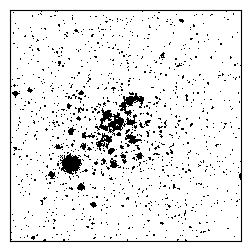

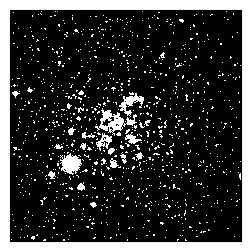

In [44]:
def read_fits_image(path='https://drive.google.com/uc?id=1DfHQZWaRQcq92Czfn0v9glFBsI6PuYZ1'):
    '''Read image from a local directory specified as string in the input path argument
       
       Returns array with image pixel values
    '''
    from astropy.io import fits
    
    return list(fits.getdata(path))
    

def plot_image(img, cmap='gray', interpolation='nearest', figsize=(3,3)):
    from matplotlib import pylab as plt
    plt.figure(figsize=figsize)
    plt.xticks([]) # disable x-axis ticks and labels
    plt.yticks([]) # disable y-axis ticks and labels
    plt.imshow(img, cmap=plt.get_cmap(cmap), interpolation=interpolation)

img = read_fits_image()
img = np.array(img)

mean, std, img_outflag = sigma_clip(img, niter = 5, s_th = 3.0)
img_background = img.copy()
img_background[img_outflag] = 0
img_background[~img_outflag] = 255

plot_image(img)

plot_image(img_outflag, cmap = 'gray', interpolation='nearest', figsize=(3,3))

plot_image(img_background)